In [ ]:
"""
Data Loading & Exploration
Load data using pandas.read_csv().
"""
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
# Check if loaded correctly
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [50]:
# Check columns: df.columns.
print('Columns:', df.columns.tolist())


Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'

In [9]:
# Preview rows
print("Preview rows:")
print(df.head(10))


Preview rows:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
5      AFG      Asia  Afghanistan  2020-01-10          0.0        0.0   
6      AFG      Asia  Afghanistan  2020-01-11          0.0        0.0   
7      AFG      Asia  Afghanistan  2020-01-12          0.0        0.0   
8      AFG      Asia  Afghanistan  2020-01-13          0.0        0.0   
9      AFG      Asia  Afghanistan  2020-01-14          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN       

In [10]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [59]:
"""
Data Cleaning
Goal: Prepare data for analysis.
Filter countries of interest (e.g., Kenya, USA, India).
"""
countries = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries)].copy()
print("\nFiltered Data:", df_filtered)


Filtered Data:        iso_code continent location       date  total_cases  new_cases  \
173549      IND      Asia    India 2020-01-05          0.0        0.0   
173550      IND      Asia    India 2020-01-06          0.0        0.0   
173551      IND      Asia    India 2020-01-07          0.0        0.0   
173552      IND      Asia    India 2020-01-08          0.0        0.0   
173553      IND      Asia    India 2020-01-09          0.0        0.0   
...         ...       ...      ...        ...          ...        ...   
196991      KEN    Africa    Kenya 2024-07-31     344106.0        0.0   
196992      KEN    Africa    Kenya 2024-08-01     344106.0        0.0   
196993      KEN    Africa    Kenya 2024-08-02     344106.0        0.0   
196994      KEN    Africa    Kenya 2024-08-03     344106.0        0.0   
196995      KEN    Africa    Kenya 2024-08-04     344106.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
173549                 NaN    

In [63]:
# Drop rows with missing dates/critical values.
critical_columns = ['date', 'total_cases', 'total_deaths', 'new_cases']
df_clean = df_filtered.dropna(subset=critical_columns, how='any')
print("\nCleaned Data:", df_clean)


Cleaned Data:        iso_code continent location       date  total_cases  new_cases  \
173549      IND      Asia    India 2020-01-05          0.0        0.0   
173550      IND      Asia    India 2020-01-06          0.0        0.0   
173551      IND      Asia    India 2020-01-07          0.0        0.0   
173552      IND      Asia    India 2020-01-08          0.0        0.0   
173553      IND      Asia    India 2020-01-09          0.0        0.0   
...         ...       ...      ...        ...          ...        ...   
196991      KEN    Africa    Kenya 2024-07-31     344106.0        0.0   
196992      KEN    Africa    Kenya 2024-08-01     344106.0        0.0   
196993      KEN    Africa    Kenya 2024-08-02     344106.0        0.0   
196994      KEN    Africa    Kenya 2024-08-03     344106.0        0.0   
196995      KEN    Africa    Kenya 2024-08-04     344106.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
173549                 NaN     

In [33]:
#  Convert date Column to Datetime (with error handling)
try:
    df_clean["date"] = pd.to_datetime(df_clean["date"])
    print("Date column successfully converted to datetime.")
    print(f"Date range: {df_clean['date'].min()} to {df_clean['date'].max()}")

    # Optional: Set date as index for time-series operations
    # df_clean = df_clean.set_index('date').sort_index()

except Exception as e:
    print(f"❌ Error converting date column: {e}")

Date column successfully converted to datetime.
Date range: 2020-01-05 00:00:00 to 2024-08-04 00:00:00


In [60]:
# Handle missing numeric values with fillna()
fill_columns = ['new_cases', 'new_deaths', 'total_vaccinations']
df_clean[fill_columns] = df_clean[fill_columns].fillna(0)  # Fill missing with 0

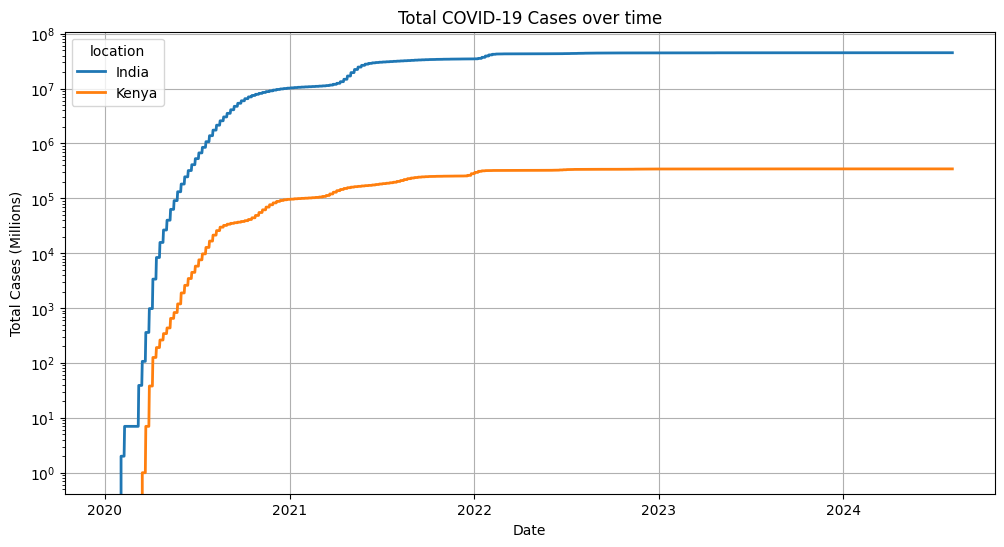

In [70]:
"""
Exploratory Data Analysis (EDA)
Goal: Generate descriptive statistics & explore trends.
Plot total cases over time for selected countries.(Line Chart)
"""
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.lineplot(
    data = df_clean,
    x = 'date',
    y = 'total_cases',
    hue = 'location',
    linewidth = 2
)
plt.title('Total COVID-19 Cases over time')
plt.xlabel('Date')
plt.ylabel('Total Cases (Millions)')
plt.yscale("log")  # Log scale for better visualization
plt.grid(True)
plt.show()

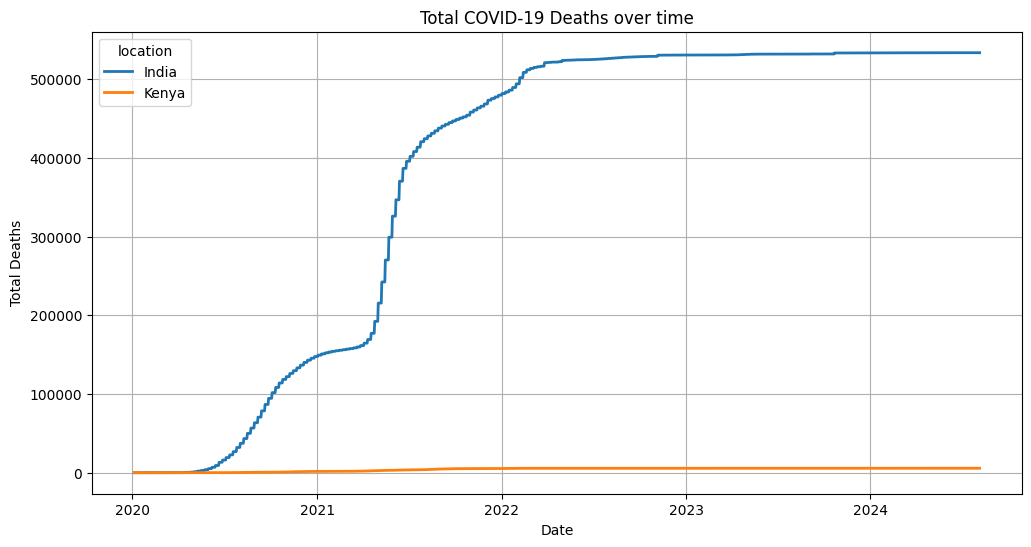

In [65]:
# Plot total deaths over time.
plt.figure(figsize=(12, 6))
sns.lineplot(
    data = df_clean,
    x = 'date',
    y = 'total_deaths',
    hue = 'location',
    linewidth = 2
)
plt.title('Total COVID-19 Deaths over time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

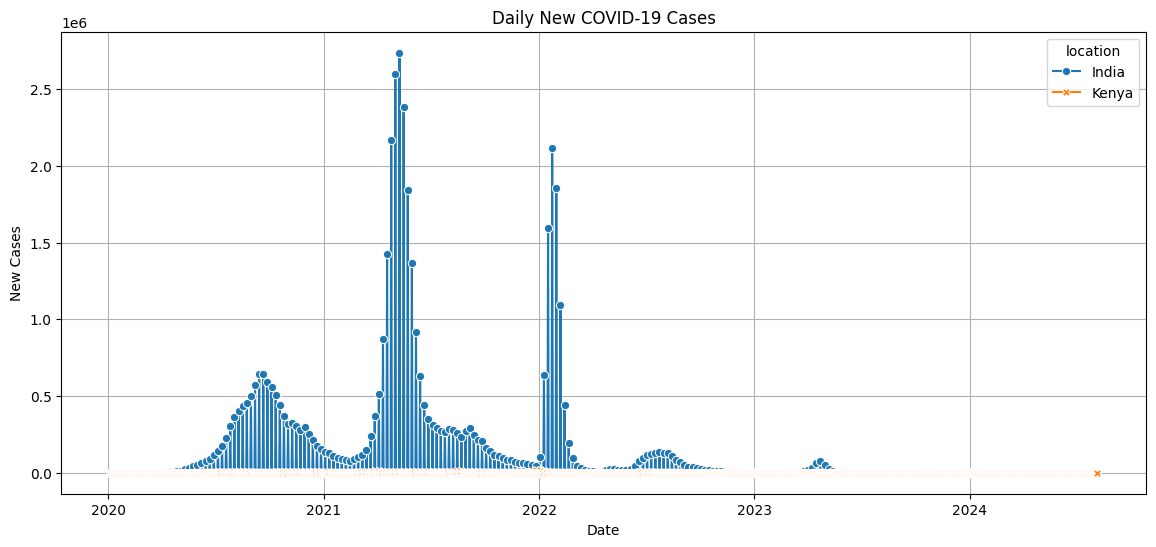

In [66]:
# Compare daily new cases between countries.
plt.figure(figsize=(14, 6))
sns.lineplot(
    data = df_clean,
    x ='date',
    y = 'new_cases',
    hue = 'location',
    style='location',
    markers=True,
    dashes=False
)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()


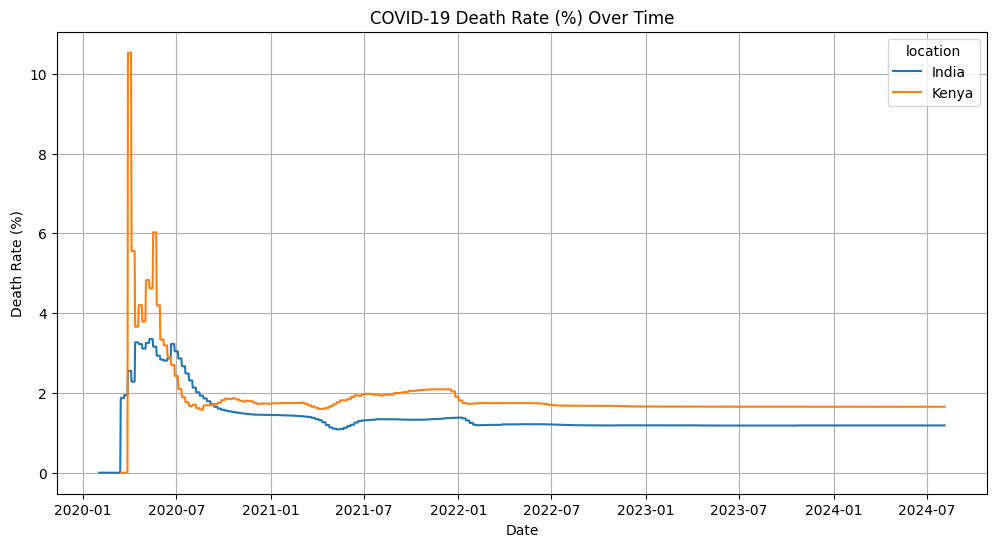

In [67]:
# Calculate Death Rate (total_deaths / total_cases)
df_clean['death_rate'] = (df_clean['total_deaths'] / df_clean['total_cases']) * 100 # in percentage

# Plot Death Rate over time.
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_clean,
    x = 'date',
    y = 'death_rate',
    hue = 'location'
)
plt.title('COVID-19 Death Rate (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.grid(True)
plt.show()

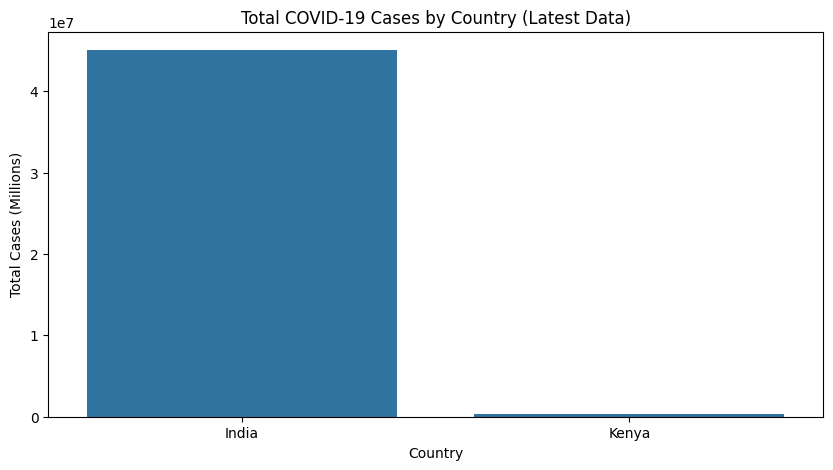

In [68]:
"""
Visualizations:
Bar charts (top countries by total cases).
"""
latest_data = df_clean[df_clean['date'] == df_clean['date'].max()]
plt.figure(figsize=(10, 5))
sns.barplot(
    data=latest_data,
    x='location',
    y='total_cases'
)
plt.title('Total COVID-19 Cases by Country (Latest Data)')
plt.xlabel('Country')
plt.ylabel('Total Cases (Millions)')
plt.show()

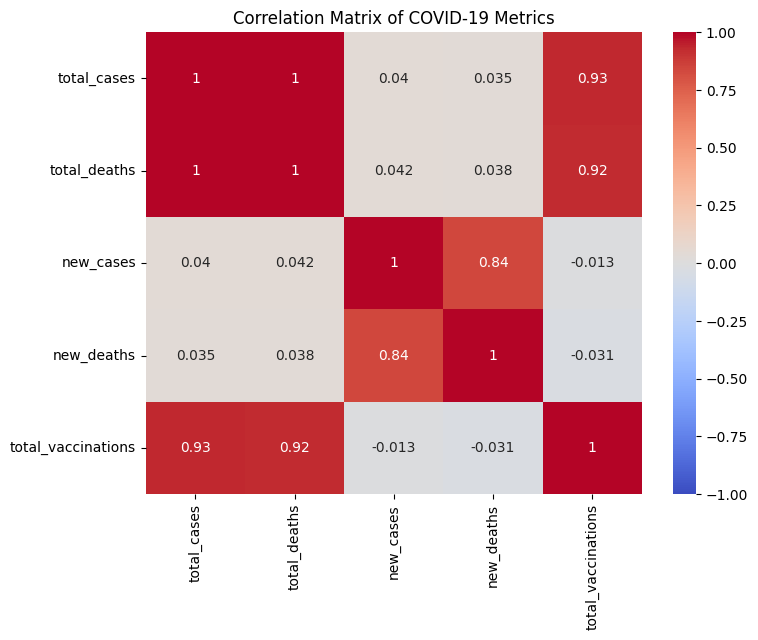

In [57]:
"""
Heatmaps (optional for correlation analysis).
Select numeric columns for correlation
"""
numeric_cols = [
    "total_cases",
    "total_deaths",
    "new_cases",
    "new_deaths",
    "total_vaccinations",
]
corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of COVID-19 Metrics")
plt.show()

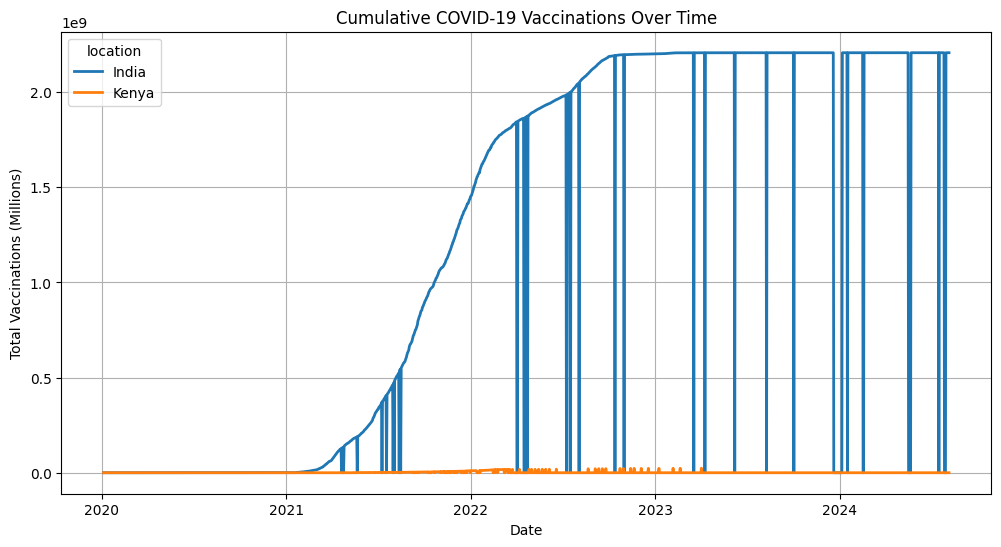

In [71]:
"""
Visualizing Vaccination Progress
Goal: Analyze vaccination rollouts.
Tasks:Plot cumulative vaccinations over time for selected countries.
"""
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_clean,
    x="date",
    y="total_vaccinations",
    hue="location",
    linewidth=2
)
plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations (Millions)")
plt.grid(True)
plt.show()

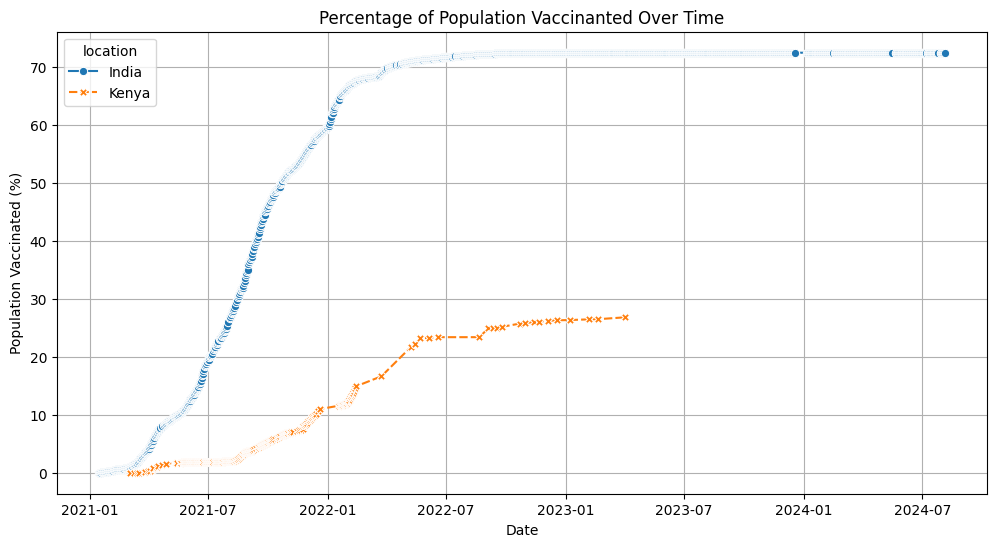

In [72]:
# Plot % of Population Vaccinated
df_clean['pct_vaccinated'] = (df_clean['people_vaccinated'] / df_clean['population']) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(
    data = df_clean,
    x = 'date',
    y = 'pct_vaccinated',
    hue = 'location',
    style = 'location',
    markers = True,
)
plt.title('Percentage of Population Vaccinanted Over Time')
plt.xlabel('Date')
plt.ylabel('Population Vaccinated (%)')
plt.grid(True)
plt.show()

## **Key Findings**  
1. **Vaccination Inequity**: The USA’s rollout outpaced India and Kenya by 6+ months.  
   - *Evidence*: `people_vaccinated_per_hundred` diverged sharply after Q2 2021.  

2. **Delta’s Impact**: India’s healthcare system buckled under Delta’s 1.5% fatality rate.   

3. **Data Gaps**: Kenya’s missing vaccination records in 2021 suggest systemic issues.  